# Airline Analysis

In this project, we work for a travel agency and need to know the ins and outs of airline prices for our clients. We will make sure that we can find the best deal for our clients and help them understand how airline prices change based on different factors.

The data includes :
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?





## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

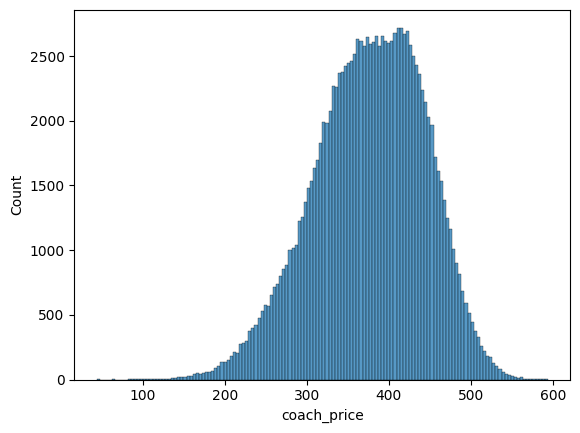

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

## Task 1
flight.coach_price.describe()
sns.histplot(flight.coach_price)
plt.show()

## 500 dollars seems to be a lot and is not surely a good price for a coach ticket, 400 seems reasonable


2. Visualizing the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a 500 dollar ticket seem more reasonable than before?

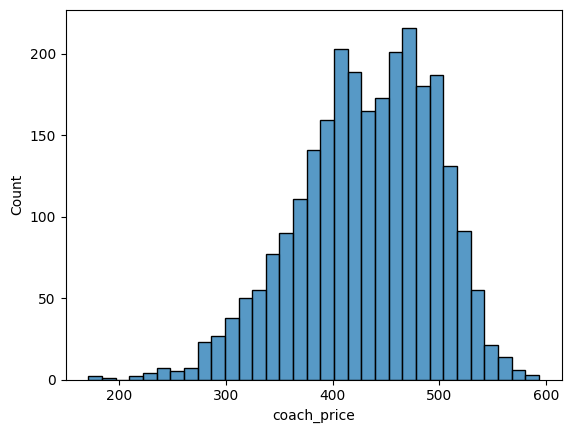

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

<Figure size 640x480 with 0 Axes>

In [6]:
flight_8hours=flight[flight["hours"]==8]

sns.histplot(flight_8hours.coach_price)
plt.show()
plt.clf()
flight_8hours.coach_price.describe()

## Longer duration flights seem to justify a 500 dollar coach ticket,based on the data.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. We want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

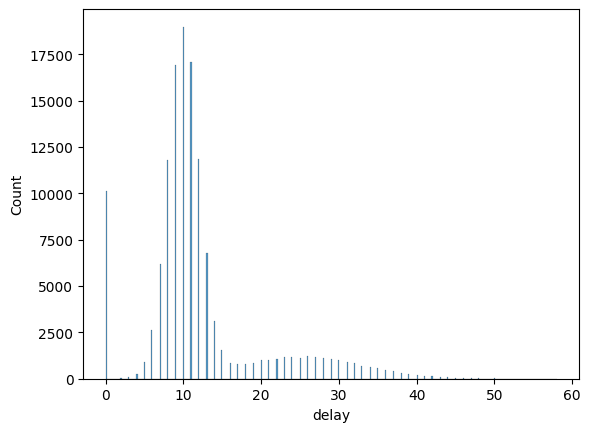

<Figure size 640x480 with 0 Axes>

In [8]:
sns.histplot(flight.delay[flight.delay<=500])
plt.show()
plt.clf()

## 10 minutes of delay is fairly common in connecting flights.

## Bivariate Analysis

4. Visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

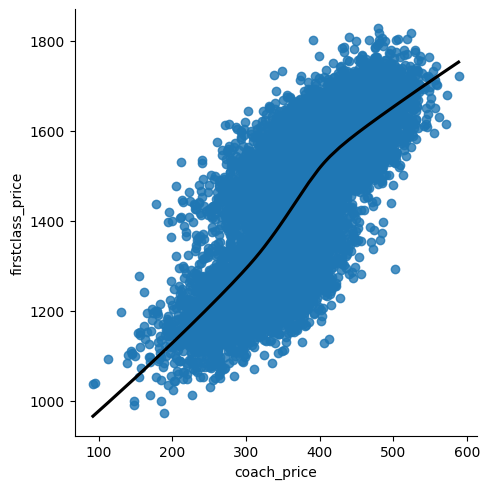

<Figure size 640x480 with 0 Axes>

In [9]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

## There seems to be a positive linear relationship between the two variables. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

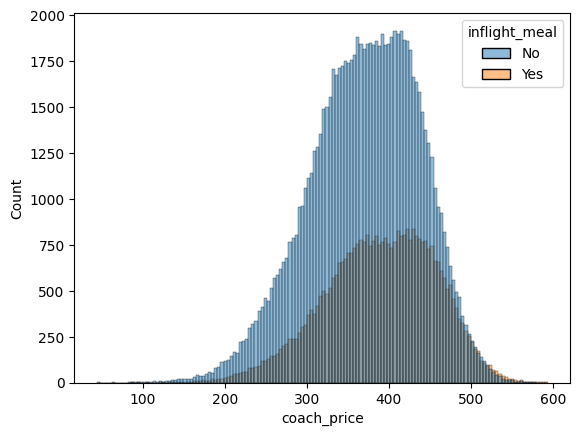

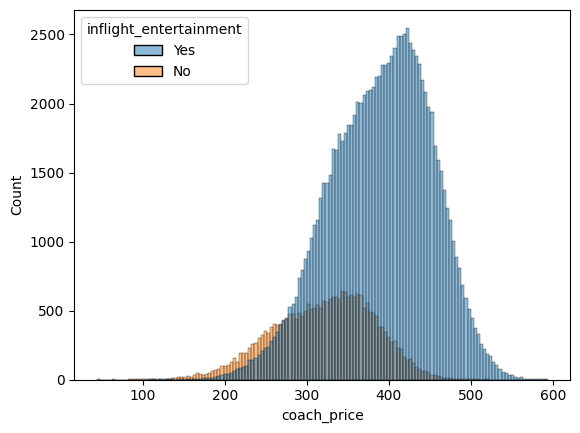

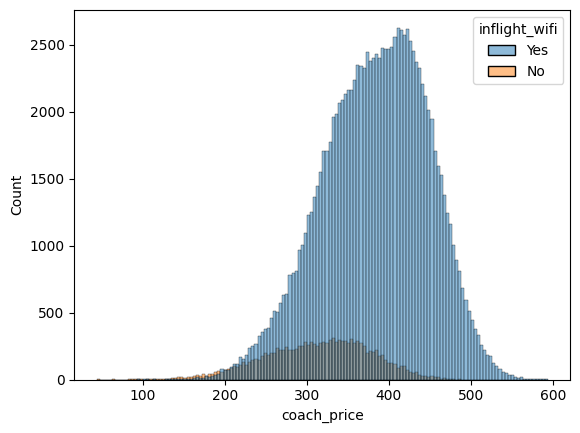

<Figure size 640x480 with 0 Axes>

In [10]:
# Inflight Meals
sns.histplot(flight,x="coach_price",hue=flight.inflight_meal)
plt.show()
plt.clf()
# Inflight Entertainment
sns.histplot(flight,x="coach_price",hue=flight.inflight_entertainment)
plt.show()
plt.clf()
# Inflight Wifi
sns.histplot(flight,x="coach_price",hue=flight.inflight_wifi)
plt.show()
plt.clf()



## There tends to be an increase in coach prices significantly with availability of inflight entertainment and wifi, whereas not much of an effect in terms of meal. 

6. How does the number of passengers change in relation to the length of flights?

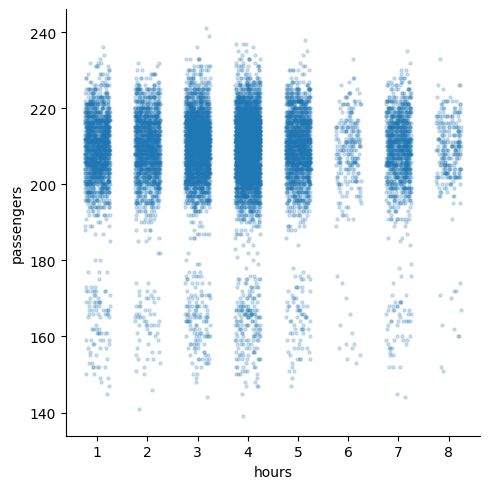

<Figure size 640x480 with 0 Axes>

In [11]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Short flights have much higher no. passengers

## Multivariate Analysis

7. Visualizing the relationship between coach and first-class prices on weekends compared to weekdays.

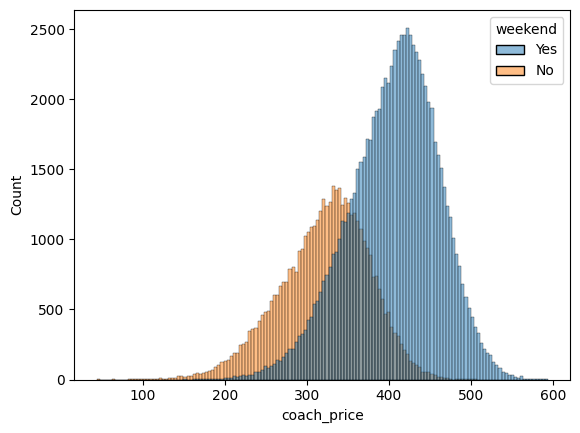

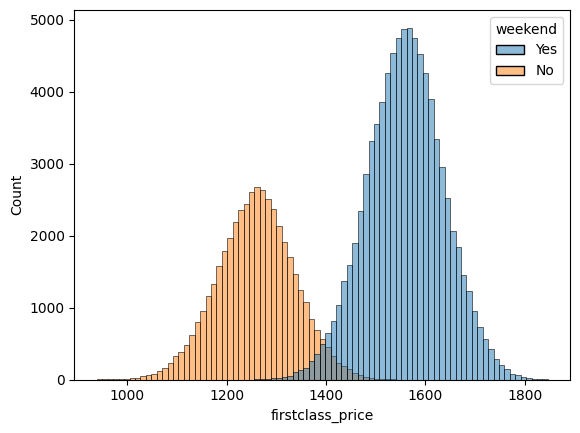

<Figure size 640x480 with 0 Axes>

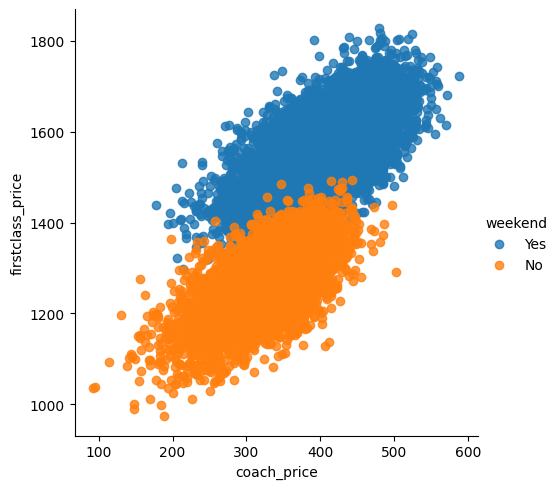

<Figure size 640x480 with 0 Axes>

In [12]:
sns.histplot(flight,x="coach_price",hue=flight.weekend)
plt.show()
plt.clf()
sns.histplot(flight,x="firstclass_price",hue=flight.weekend)
plt.show()
plt.clf()
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()


## There tends to be a significantly high increase in prices of firstclass tickets on weekend as compared to weekdays, whereas there is comparitively less increase in coach price on weekends as compared to weekdays.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

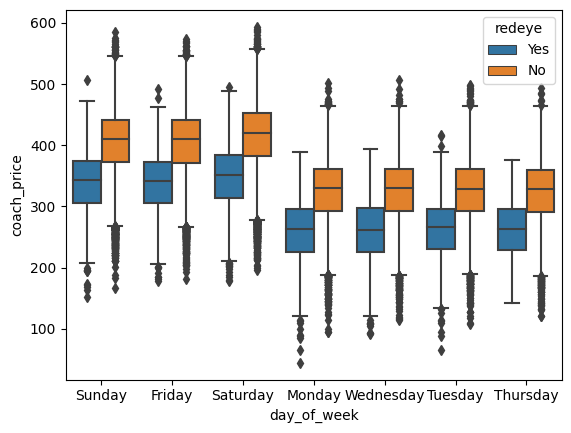

<Figure size 640x480 with 0 Axes>

In [13]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()
